# Lab 9 - LDA
## Lecture 9

In [13]:
library('ggplot2')
library('reshape2')

In [14]:
g1 <- data.frame(group=1,x = rnorm(100,1,1))
g2 <- data.frame(group=2,x = rnorm(100,5,1))
g3 <- data.frame(group=3,x = rnorm(100,20,1))
d = rbind(g1,g2,g3)
d$group <- as.factor(d$group)

In [18]:
head(d[sample(nrow(d)),])

,group,x
,<fct>,<dbl>
58,1,2.8877529
180,2,5.2113537
285,3,19.7134968
45,1,-0.8653701
112,2,5.5440411
252,3,21.4830915


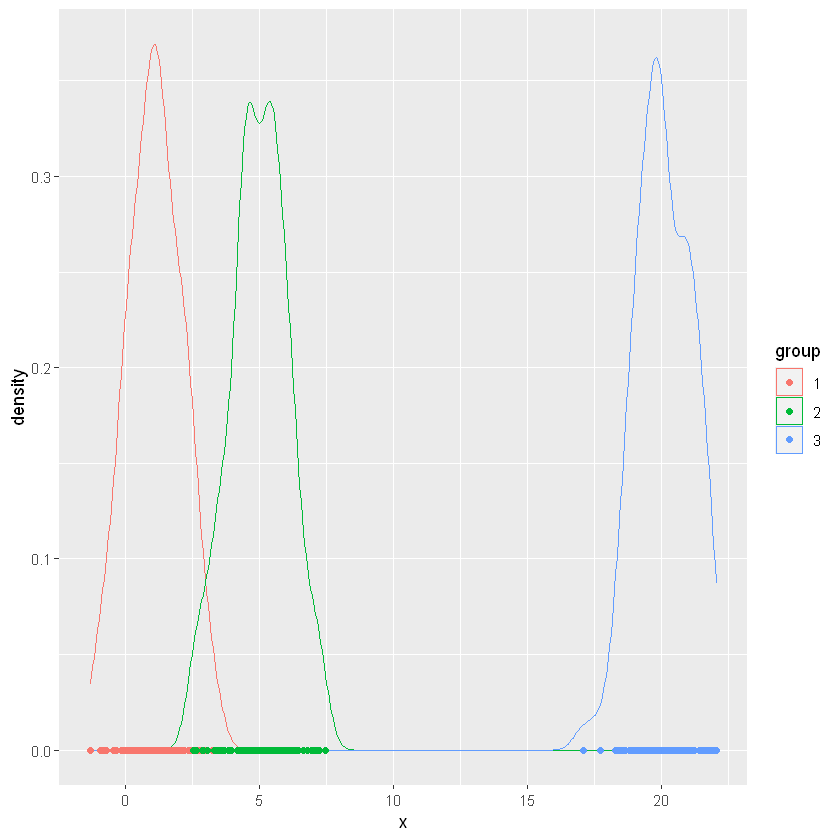

In [19]:
ggplot(data=d,mapping=aes(x=x,color=group,group=group))+geom_density()+geom_point(mapping=aes(x=x,y=0))

In [29]:
x0=1
class=1
  
subd = d[d$group==class,]
muhat = mean(subd$x)
# pooled sd estimate
sighat = sqrt(mean(aggregate(x~group,data=d,FUN=var)[,2]))
pi_hat = mean(d$group==class)
dnorm(x0,mean=muhat,sd=sighat)*pi_hat

[1] 0.1266278

In [35]:
delta_lda=function(x0,class){
  subd = d[d$group==class,]
  muhat = mean(subd$x)
  sighat = sqrt(mean(aggregate(x~group,data=d,FUN=var)[,2]))
  pi_hat = mean(d$group==class)
  dnorm(x0,mean=muhat,sd=sighat)*pi_hat
}
y_hat = which.max(c(delta_lda(7,1),
    delta_lda(7,2),
    delta_lda(7,3)))
y_hat

[1] 2

In [36]:
delta_lda2=function(x0,class){
  subd = d[d$group==class,]
  muhat = mean(subd$x)
  sighat = sqrt(mean(aggregate(x~group,data=d,FUN=var)[,2]))
  pi_hat = mean(d$group==class)
  muhat*x0/(sighat^2) - muhat^2/(2*sighat^2)+log(pi_hat)
}
y_hat = which.max(c(delta_lda2(7,1),
    delta_lda2(7,2),
    delta_lda2(7,3)))
y_hat

[1] 2

In [39]:
lda_pred <- data.frame(
  '1'=delta_lda2(d$x,1),
  '2'=delta_lda2(d$x,2),
  '3'=delta_lda2(d$x,3)
)
lda_preds = apply(lda_pred,1,which.max)
sample(lda_preds,5)

[1] 1 3 3 1 1

In [40]:
library('MASS')
?lda

lda {MASS},R Documentation
formula,"A formula of the form groups ~ x1 + x2 + ... That is, the response is the grouping factor and the right hand side specifies the (non-factor) discriminators."
data,"An optional data frame, list or environment from which variables specified in formula are preferentially to be taken."
x,(required if no formula is given as the principal argument.) a matrix or data frame or Matrix containing the explanatory variables.
grouping,(required if no formula principal argument is given.) a factor specifying the class for each observation.
prior,"the prior probabilities of class membership. If unspecified, the class proportions for the training set are used. If present, the probabilities should be specified in the order of the factor levels."
tol,A tolerance to decide if a matrix is singular; it will reject variables and linear combinations of unit-variance variables whose variance is less than tol^2.
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
method,"""moment"" for standard estimators of the mean and variance, ""mle"" for MLEs, ""mve"" to use cov.mve, or ""t"" for robust estimates based on a t distribution."
CV,"If true, returns results (classes and posterior probabilities) for leave-one-out cross-validation. Note that if the prior is estimated, the proportions in the whole dataset are used."


In [42]:
mod = lda(group~x,data=d)
mod

Call:
lda(group ~ x, data = d)

Prior probabilities of groups:
        1         2         3 
0.3333333 0.3333333 0.3333333 

Group means:
          x
1  1.106322
2  4.998168
3 20.071380

Coefficients of linear discriminants:
        LD1
x 0.9571706

In [45]:
mod_pred = predict(mod,d)$class
sample(mod_pred,5)

[1] 2 1 2 1 3
Levels: 1 2 3

### same answer as our own version

In [46]:
mean(as.integer(mod_pred)!=lda_preds)

[1] 0

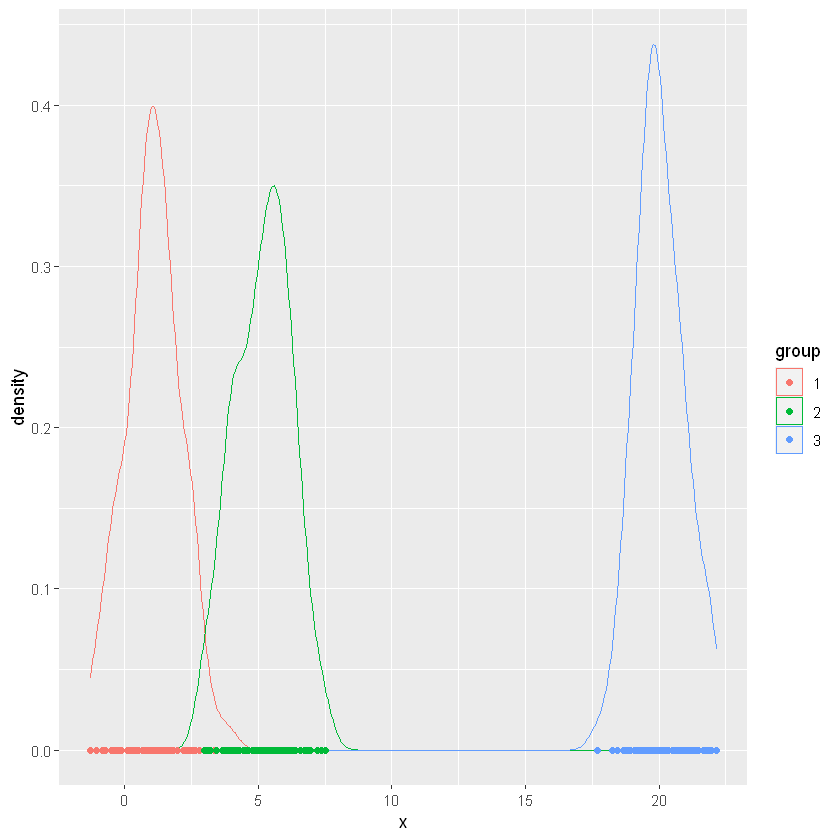

In [10]:
ests = function(predfn){
  xs = seq(min(d$x),max(d$x),.01)
  lda_pred <- data.frame(
    '1'=predfn(xs,1),
    '2'=predfn(xs,2),
    '3'=predfn(xs,3)
  )
  mlda_pred = melt(cbind(lda_pred,xs),id.vars='xs')
  colnames(mlda_pred)<-c('x','group','value')
  levels(mlda_pred$group) <- 1:3
  lda_preds = data.frame('x'=xs,apply(lda_pred,1,which.max))
  colnames(lda_preds) <- c('x','group')
  lda_preds$group <- as.factor(lda_preds$group)
  return(list(pfn=mlda_pred,preds=lda_preds))
}

ggplot(data=d,mapping=aes(x=x,color=group,group=group))+geom_density()+geom_point(mapping=aes(x=x,y=0))

### LDA discr functions

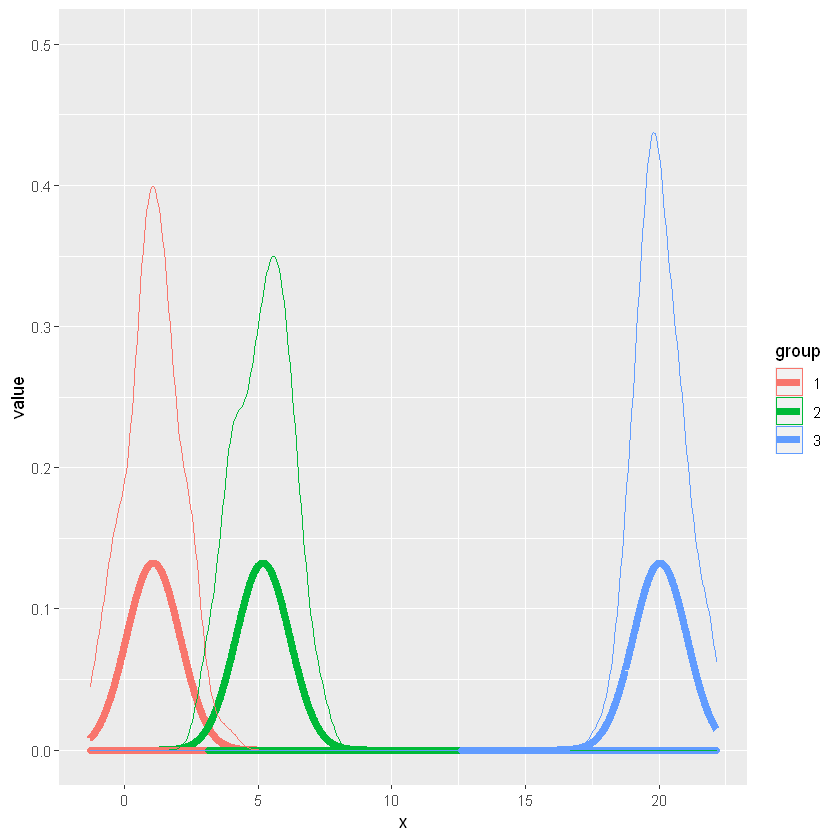

In [11]:
ests_lda = ests(delta_lda)
ggplot(data=ests_lda$pfn,mapping=aes(x=x,y=value,color=group))+geom_line(size=2)+geom_point(data=ests_lda$preds,mapping=aes(x=x,y=0))+
  geom_density(data=d,mapping=aes(x=x,color=group,group=group),inherit.aes=FALSE)+ylim(0,.5)

### discr funcs for second version

Warning message:
"Removed 3598 row(s) containing missing values (geom_path)."


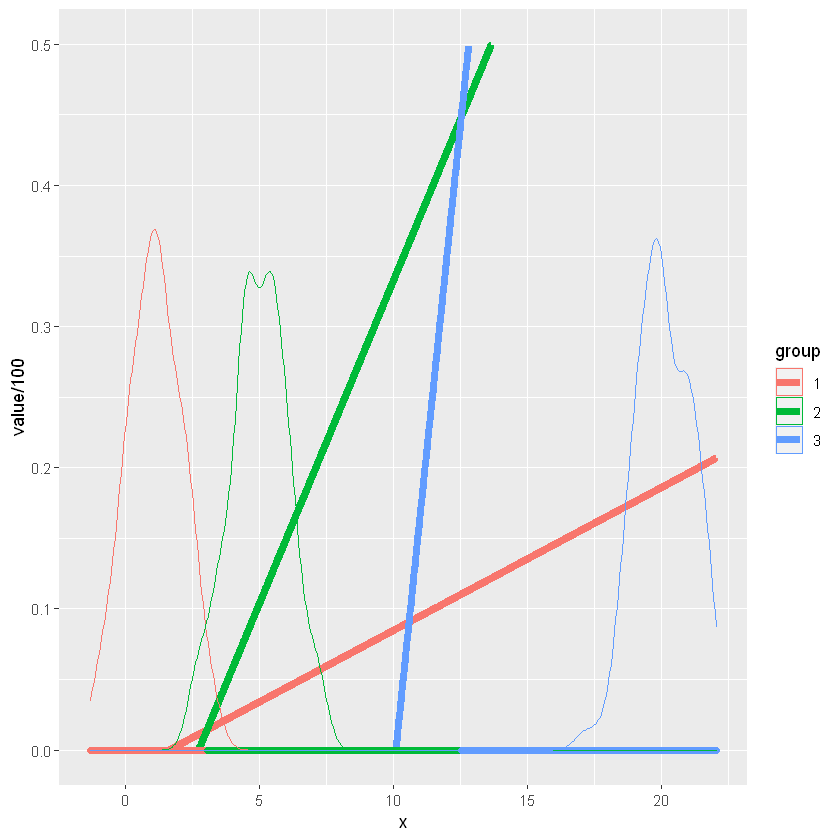

In [47]:
ests_lda2 = ests(delta_lda2)
ggplot(data=ests_lda2$pfn,mapping=aes(x=x,y=value/100,color=group))+geom_line(size=2)+geom_point(data=ests_lda2$preds,mapping=aes(x=x,y=0))+
  geom_density(data=d,mapping=aes(x=x,color=group,group=group),inherit.aes=FALSE)+ylim(0,.5)